In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

In [2]:
import matplotlib.pyplot as plt

In [3]:
from PIL import Image

In [4]:
import sys
sys.path.append("../figures")

from robust_what import WhatShift, WhatBackground, WhatNet, WhatTrainer, What, train, test, MNIST

In [5]:
from main import init
args = init(filename='../data/2019-06-12')
args

{'w': 28,
 'minibatch_size': 100,
 'train_batch_size': 50000,
 'test_batch_size': 10000,
 'noise_batch_size': 1000,
 'mean': 0.1307,
 'std': 0.3081,
 'N_pic': 128,
 'offset_std': 30,
 'offset_max': 34,
 'noise': 1.0,
 'contrast': 0.7,
 'sf_0': 0.1,
 'B_sf': 0.1,
 'N_theta': 6,
 'N_azimuth': 24,
 'N_eccentricity': 10,
 'N_phase': 2,
 'rho': 1.41,
 'bias_deconv': True,
 'p_dropout': 0.0,
 'dim1': 1000,
 'dim2': 1000,
 'lr': 0.005,
 'do_adam': True,
 'bn1_bn_momentum': 0.5,
 'bn2_bn_momentum': 0.5,
 'momentum': 0.3,
 'epochs': 60,
 'num_processes': 1,
 'no_cuda': True,
 'log_interval': 100,
 'verbose': 1,
 'filename': '../data/2019-06-05',
 'seed': 2019,
 'N_cv': 10,
 'do_compute': True,
 'what_offset_std': 5.0,
 'what_offset_max': 15}

## Unit tests

In [6]:
transform=transforms.Compose([
                               WhatShift(args, i_offset=None, j_offset=None),
                               WhatBackground(),
                               transforms.ToTensor(),
                               #transforms.Normalize((args.mean,), (args.std,))
                           ])

In [7]:
dataset_train = MNIST('../data',
                        train=True,
                        download=True,
                        transform=transform,
                        )

In [8]:
train_loader = torch.utils.data.DataLoader(dataset_train,
                                         batch_size=args.minibatch_size,
                                         shuffle=True)

In [9]:
dataset_test = MNIST('../data',
                        train=False,
                        download=True,
                        transform=transform,
                        )

In [10]:
test_loader = torch.utils.data.DataLoader(dataset_test,
                                         batch_size=args.minibatch_size,
                                         shuffle=True)

In [11]:
data, label = next(iter(test_loader))

In [12]:
label.shape

torch.Size([100])

Text(0.5, 1.0, 'label : 1')

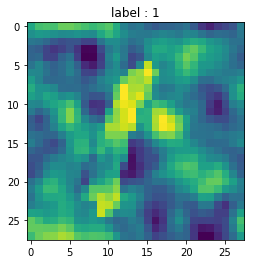

In [13]:
i = 3
plt.imshow(data[i,:,:].detach().numpy().reshape((28, 28)))
plt.title('label : '+str(label[i].item()))

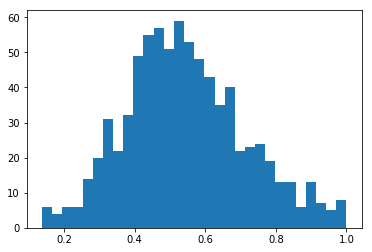

In [15]:
h = plt.hist(data[i,:,:].detach().numpy().flatten(), 30)

In [16]:
device = 'cpu'
model = WhatNet(args).to(device)
loss_func = F.nll_loss
optimizer = optim.Adam(model.parameters(), lr = 1e-3)

In [17]:
if False:
    for epoch in range(1, args.epochs + 1):
        train(args, model, device, train_loader, loss_func, optimizer, epoch)
        test(args, model, device, test_loader)

## What class test

In [16]:
if False :
    import sys
    sys.path.append("../figures")

    from robust_what import WhatShift, WhatBackground, WhatNet, WhatTrainer, What, train, test, MNIST

    from main import init
    args = init(filename='../data/2019-06-12')

    args.epochs = 2
    args.save_model = False

    args.do_adam = False
    args.what_offset_std = 2.0
    what = What(args=args, force= True)

## Correction test_loader calcul accuracy

In [17]:
if False :
    
    import sys
    sys.path.append("../figures")

    import torch
    from torchvision import transforms

    from robust_what import WhatShift, WhatBackground, WhatNet, WhatTrainer, What, train, test, MNIST

    from main import init
    args = init(filename='../data/2019-06-12')

    args.epochs = 3
    args.save_model = True

    args.lr = 1
    args.do_adam = 'adadelta'

    args.what_offset_std = 3.0
    what = What(args=args, force=False)




    model = what.model
    transform = transforms.Compose([
        WhatShift(args),
        WhatBackground(contrast=args.contrast, noise=args.noise, sf_0=args.sf_0, B_sf=args.B_sf, seed=args.seed),
        transforms.ToTensor(),
        transforms.Normalize((args.mean,), (args.std,))
    ])
    dataset_test = MNIST('../data',
                                  train=False,
                                  download=True,
                                  transform=transform,
                                  )
    test_loader = torch.utils.data.DataLoader(dataset_test,
                                              batch_size=args.minibatch_size,
                                              shuffle=True)
    
    print("test_loader")
    whatTrainer = WhatTrainer(args, model=model, test_loader=test_loader)
    acc = whatTrainer.test()
    print("what.test_loader")
    whatTrainer = WhatTrainer(args, model=model, test_loader=what.trainer.test_loader)
    acc = whatTrainer.test()

In [18]:
if False :
    
    data, label = next(iter(test_loader))

    i = 3
    plt.imshow(data[i,:,:].detach().numpy().reshape((28, 28)))
    plt.title('label : '+str(label[i].item()))

    plt.plot(data[i,:,:].detach().numpy().flatten())


    data, label = next(iter(what.trainer.test_loader))

    i = 3
    plt.imshow(data[i,:,:].detach().numpy().reshape((28, 28)))
    plt.title('label : '+str(label[i].item()))

    plt.plot(data[i,:,:].detach().numpy().flatten())

## MNIST_cnn_robust_what_0.1_0.1_1.0_0.7_5epoques_2019-06-17_16h55.pt

Réseau entrainé avec std croissants 

liste_std = [i + 0.5 for i in range(0, 11)] args.do_adam = 'adam' et seed incrémenté entre chaque std différent

### Script entraînement de MNIST_cnn_robust_what_0.1_0.1_1.0_0.7_5epoques_2019-06-17_16h55.pt

In [ ]:
if False :
    import sys
    import datetime

    sys.path.append("../figures")
    from robust_what import WhatShift, WhatBackground, WhatNet, WhatTrainer, What, train, test, MNIST
    from main import init

    args = init(filename='../data/2019-06-12')

    args.epochs = 5  # 10 plus tard
    args.save_model = True

    debut = datetime.datetime.now()
    date = str(debut)

    liste_std = [i + 0.5 for i in range(0, 11)]  # pas de 1 de std en partant de 0.5 (essai)

    args.do_adam = 'adam'
    args.what_offset_std = liste_std[0]
    print("En cours : std = 0.5\n")
    what = What(args, force=True, seed=0)

    seed = 1
    for std in liste_std[1:]:
        print("En cours : std = " + str(std) + "\n")

        args.what_offset_std = std
        what_model = what.model
        what = What(args, model=what_model, force=True, seed=seed)
        seed += 1
        print("\n")

    fin = datetime.datetime.now()
    print("\n\nDuree d'execution : " + str(fin - debut))

### Accuracy de MNIST_cnn_robust_what_0.1_0.1_1.0_0.7_5epoques_2019-06-17_16h55.pt

In [19]:
model = torch.load("../data/MNIST_cnn_robust_what_0.1_0.1_1.0_0.7_5epoques_2019-06-17_16h55.pt")
transform = transforms.Compose([
    WhatShift(args),
    WhatBackground(contrast=args.contrast, noise=args.noise, sf_0=args.sf_0, B_sf=args.B_sf, seed=args.seed),
    transforms.ToTensor(),
    transforms.Normalize((args.mean,), (args.std,))
])
dataset_test = MNIST('../data',
                              train=False,
                              download=True,
                              transform=transform,
                              )
test_loader = torch.utils.data.DataLoader(dataset_test,
                                          batch_size=args.minibatch_size,
                                          shuffle=True)


if True :
    whatTrainer = WhatTrainer(args, model=model, test_loader=test_loader)
    acc = whatTrainer.test()


Test set: Average loss: 0.0065, Accuracy: 8126/10000 (81%)



(Ce test a déjà été fait tout en bas de 2019-06-11_Marion_tests2_robust_what)

### Accuracy Map de MNIST_cnn_robust_what_0.1_0.1_1.0_0.7_5epoques_2019-06-17_16h55.pt

Le maximum d'accuracy est de  0.9127  au centre.


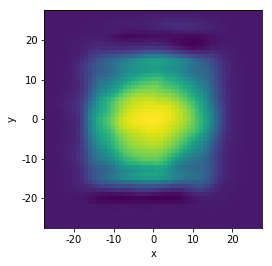

In [9]:
pathAccuracyMapTxt = '../dev/AccuracyMap_--MNIST_cnn_robust_what_0.1_0.1_1.0_0.7_5epoques_2019-06-17_16h55--_2019-06-18_17h06.txt'

file = np.loadtxt(pathAccuracyMapTxt, max_rows=55)

plt.xlabel("x")
plt.ylabel("y")

plt.xticks([i for i in range(7,55,10)], [i for i in range(-20,25,10)])
plt.yticks([i for i in range(7,55,10)], [i for i in range(20,-25,-10)])

plt.imshow(file)

print("Le maximum d'accuracy est de ", np.amax(file), " au centre.")

plt.imshow(file)

### Acuracy Lign et Posterior test de MNIST_cnn_robust_what_0.1_0.1_1.0_0.7_5epoques_2019-06-17_16h55.pt

([<matplotlib.axis.XTick at 0xba8d588>,
 <a list of 5 Text xticklabel objects>)

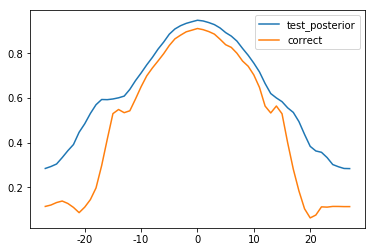

In [13]:
pathAccuracyMapTxt = '../dev/AccuracyLign_--MNIST_cnn_robust_what_0.1_0.1_1.0_0.7_5epoques_2019-06-17_16h55--_2019-06-18_16h38.txt'

file = np.loadtxt(pathAccuracyMapTxt, max_rows=2)
plt.plot(file.T)
plt.legend(['test_posterior', 'correct'])
plt.xticks([i for i in range(7,55,10)], [i for i in range(-20,25,10)])

## MNIST_cnn_robust_what_0.1_0.1_1.0_0.7_5epoques_2019-06-19_11h50.pt

Réseau entrainé à std croisants.

liste_std = [i for i in range(0, 16)] 5 epoques par std args.what_offset_max = 25 et args.do_adam = 'adam'

### Script d'entraînement de MNIST_cnn_robust_what_0.1_0.1_1.0_0.7_5epoques_2019-06-19_11h50.pt

In [ ]:
if False :
    import sys
    import datetime

    sys.path.append("../figures")
    from robust_what import WhatShift, WhatBackground, WhatNet, WhatTrainer, What, train, test, MNIST
    from main import init

    args = init(filename='../data/2019-06-12')

    args.epochs = 5  # 10 plus tard
    args.save_model = True

    debut = datetime.datetime.now()
    date = str(debut)

    liste_std = [i for i in range(0, 16)]  # pas de 1 de std

    args.what_offset_max = 25
    args.do_adam = 'adam'
    args.what_offset_std = liste_std[0]
    print("En cours : std = 0\n")
    what = What(args, force=True, seed=0)

    seed = 1
    for std in liste_std[1:]:
        print("En cours : std = " + str(std) + "\n")

        args.what_offset_std = std
        what_model = what.model
        what = What(args, model=what_model, force=True, seed=seed)
        seed += 1
        print("\n")

    fin = datetime.datetime.now()
    print("\n\nDuree d'execution : " + str(fin - debut))



### Accuracy de MNIST_cnn_robust_what_0.1_0.1_1.0_0.7_5epoques_2019-06-19_11h50.pt

In [10]:
model = torch.load("../data/MNIST_cnn_robust_what_0.1_0.1_1.0_0.7_5epoques_2019-06-19_11h50.pt")
transform = transforms.Compose([
    WhatShift(args),
    WhatBackground(contrast=args.contrast, noise=args.noise, sf_0=args.sf_0, B_sf=args.B_sf, seed=args.seed),
    transforms.ToTensor(),
    transforms.Normalize((args.mean,), (args.std,))
])
dataset_test = MNIST('../data',
                              train=False,
                              download=True,
                              transform=transform,
                              )
test_loader = torch.utils.data.DataLoader(dataset_test,
                                          batch_size=args.minibatch_size,
                                          shuffle=True)


if True :
    whatTrainer = WhatTrainer(args, model=model, test_loader=test_loader)
    acc = whatTrainer.test()


Test set: Average loss: 0.0082, Accuracy: 7935/10000 (79%)



### Accuracy Map de MNIST_cnn_robust_what_0.1_0.1_1.0_0.7_5epoques_2019-06-19_11h50.pt

Le maximum d'accuracy est de  0.8941  au centre.


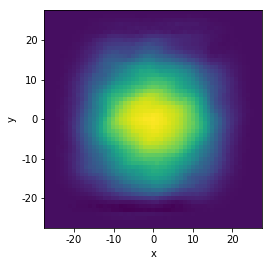

In [6]:
pathAccuracyMapTxt = '../dev/AccuracyMap_--MNIST_cnn_robust_what_0.1_0.1_1.0_0.7_5epoques_2019-06-19_11h50--_2019-06-19_12h23.txt'

file = np.loadtxt(pathAccuracyMapTxt, max_rows=55)

plt.xlabel("x")
plt.ylabel("y")

plt.xticks([i for i in range(7,55,10)], [i for i in range(-20,25,10)])
plt.yticks([i for i in range(7,55,10)], [i for i in range(20,-25,-10)])

plt.imshow(file)

print("Le maximum d'accuracy est de ", np.amax(file), " au centre.")

plt.imshow(file)

##### Transformation de l'Accuracy Map au format .npy sans la dernière ligne durée d'exécution 

In [7]:
if False :
    pathDuFichierTxt = '../dev/'
    nomDuFichierTxt = 'AccuracyMap_--MNIST_cnn_robust_what_0.1_0.1_1.0_0.7_5epoques_2019-06-19_11h50--_2019-06-19_12h23.txt'
    nouveauNom = nomDuFichierTxt[0:-4] + ".npy"

    file = np.loadtxt(pathDuFichierTxt + nomDuFichierTxt, max_rows=55)

    np.save(nouveauNom, file)

In [12]:
if False :
    AccuracyMap = np.load(nouveauNom)

    plt.imshow(AccuracyMap)

### Accuracy Lign de MNIST_cnn_robust_what_0.1_0.1_1.0_0.7_5epoques_2019-06-19_11h50.pt

([<matplotlib.axis.XTick at 0xc07b2b0>,
 <a list of 5 Text xticklabel objects>)

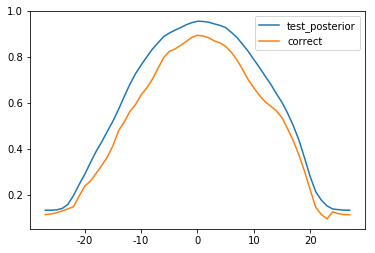

In [13]:
pathAccuracyMapTxt = '../dev/AccuracyLign_--MNIST_cnn_robust_what_0.1_0.1_1.0_0.7_5epoques_2019-06-19_11h50--_2019-06-19_12h24.txt'

file = np.loadtxt(pathAccuracyMapTxt, max_rows=2)
plt.plot(file.T)
plt.legend(['test_posterior', 'correct'])
plt.xticks([i for i in range(7,55,10)], [i for i in range(-20,25,10)])

## MNIST_cnn_robust_what_0.1_0.1_1.0_0.1_5epoques_2019-06-20_14h05.pt

Réseau entraîné avec std croissant puis contrast décroissant

avec args.offset_max = 25, liste_std = [i for i in range(0, 16)] et liste_contrast = [i/10 for i in range(6, 0, -1)]

Script 2019-06-20_Marion_EssaiEntrainementsSuccessifsStdCroissantContrasteDecroissant.py

### Accuracy de MNIST_cnn_robust_what_0.1_0.1_1.0_0.1_5epoques_2019-06-20_14h05.pt

In [31]:
# model = torch.load("../data/MNIST_cnn_robust_what_0.1_0.1_1.0_0.1_5epoques_2019-06-20_14h05.pt")

names_models = ["MNIST_cnn_robust_what_0.1_0.1_1.0_0.7_5epoques_2019-06-20_13h27.pt", "MNIST_cnn_robust_what_0.1_0.1_1.0_0.6_5epoques_2019-06-20_13h34.pt", "MNIST_cnn_robust_what_0.1_0.1_1.0_0.5_5epoques_2019-06-20_13h40.pt", "MNIST_cnn_robust_what_0.1_0.1_1.0_0.4_5epoques_2019-06-20_13h46.pt", "MNIST_cnn_robust_what_0.1_0.1_1.0_0.3_5epoques_2019-06-20_13h52.pt", "MNIST_cnn_robust_what_0.1_0.1_1.0_0.2_5epoques_2019-06-20_13h58.pt", "MNIST_cnn_robust_what_0.1_0.1_1.0_0.1_5epoques_2019-06-20_14h05.pt"]

list_contrast = [i/10 for i in range(7, 0, -1)]
resultats_par_reseau = []
print(resultats_par_reseau)

for name_model in names_models :
    model = torch.load("../data/" + name_model)
    print("Réseau en cours : ", name_model)
    resultats_par_contraste = []
    for contrast in list_contrast :
        transform = transforms.Compose([
            WhatShift(args),
            WhatBackground(contrast=contrast, noise=args.noise, sf_0=args.sf_0, B_sf=args.B_sf, seed=args.seed),
            transforms.ToTensor(),
            transforms.Normalize((args.mean,), (args.std,))
        ])
        dataset_test = MNIST('../data',
                                      train=False,
                                      download=True,
                                      transform=transform,
                                      )
        test_loader = torch.utils.data.DataLoader(dataset_test,
                                                  batch_size=args.minibatch_size,
                                                  shuffle=True)


        if True :
            print("Pour contrast = ", contrast, " :")
            whatTrainer = WhatTrainer(args, model=model, test_loader=test_loader)
            acc = whatTrainer.test()
            resultats_par_contraste.append(acc)
    resultats_par_reseau.append(resultats_par_contraste)

[]
Réseau en cours :  MNIST_cnn_robust_what_0.1_0.1_1.0_0.7_5epoques_2019-06-20_13h27.pt
Pour contrast =  0.7  :

Test set: Average loss: 0.0082, Accuracy: 7935/10000 (79%)

Pour contrast =  0.6  :

Test set: Average loss: 0.0079, Accuracy: 7710/10000 (77%)

Pour contrast =  0.5  :

Test set: Average loss: 0.0106, Accuracy: 6691/10000 (67%)

Pour contrast =  0.4  :

Test set: Average loss: 0.0183, Accuracy: 3912/10000 (39%)

Pour contrast =  0.3  :

Test set: Average loss: 0.0231, Accuracy: 1797/10000 (18%)

Pour contrast =  0.2  :

Test set: Average loss: 0.0234, Accuracy: 1207/10000 (12%)

Pour contrast =  0.1  :

Test set: Average loss: 0.0232, Accuracy: 1098/10000 (11%)

Réseau en cours :  MNIST_cnn_robust_what_0.1_0.1_1.0_0.6_5epoques_2019-06-20_13h34.pt
Pour contrast =  0.7  :

Test set: Average loss: 0.0075, Accuracy: 8275/10000 (83%)

Pour contrast =  0.6  :

Test set: Average loss: 0.0072, Accuracy: 8082/10000 (81%)

Pour contrast =  0.5  :

Test set: Average loss: 0.0090, Acc

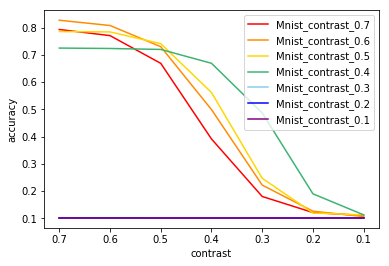

In [69]:
# colors = ["lightblue", "lightskyblue", "deepskyblue", "dodgerblue", "cornflowerblue", "royalblue", "blue"]
colors = ["r", "darkorange", "gold", "mediumseagreen", "skyblue", "b", "purple"]

for i in range(7):
    plt.plot(resultats_par_reseau[i], colors[i])
#print([names_models[i][0:4] for i in range(7)))
plt.legend(["Mnist_contrast_" + names_models[i][34:37] for i in range(7)])
plt.xticks([i for i in range(7)], [i/10 for i in range(7,0,-1)])
plt.xlabel("contrast")
plt.ylabel("accuracy")
plt.show()


In [21]:
transform = transforms.Compose([
        WhatShift(args),
        WhatBackground(contrast=contrast, noise=args.noise, sf_0=args.sf_0, B_sf=args.B_sf, seed=args.seed),
        #transforms.ToTensor(),
        #transforms.Normalize((args.mean,), (args.std,))
    ])
dataset_test = MNIST('../data',
                                  train=False,
                                  download=True,
                                  transform=transform,
                                  )
test_loader = torch.utils.data.DataLoader(dataset_test,
                                              batch_size=args.minibatch_size,
                                              shuffle=True)
data, target = next(iter(test_loader))

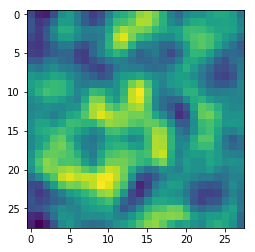

In [24]:
plt.imshow(data[0,:,:].reshape(28,28))

In [23]:
data[0,:,:].shape

torch.Size([28, 28, 1])